In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
template_paths = {}

template_paths['man_fixed_dog_varied'] = {
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_full_prompt.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectA.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectB.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectC.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_dog.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_man.csv'

    'full_prompt':'semantic_drift_combine_two/ti_432_steps_1000_pet_dog1_steps_{}/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_full_prompt.csv',
    'custom_prompt_A':'semantic_drift_combine_two/ti_432_steps_1000_pet_dog1_steps_{}/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectA.csv',
    'custom_prompt_B':'semantic_drift_combine_two/ti_432_steps_1000_pet_dog1_steps_{}/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectB.csv',
    'context':'semantic_drift_combine_two/ti_432_steps_1000_pet_dog1_steps_{}/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectC.csv',
    'anchor_dog':'semantic_drift_combine_two/ti_432_steps_1000_pet_dog1_steps_{}/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_dog.csv',
    'anchor_man':'semantic_drift_combine_two/ti_432_steps_1000_pet_dog1_steps_{}/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_man.csv'
}

template_paths['man_varied_dog_fixed'] = {
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_full_prompt.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectA.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectB.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectC.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_dog.csv'
    # 'semantic_drift_combine_two/ti_432_steps_100_pet_dog1_steps_1000/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_man.csv'

    'full_prompt':'semantic_drift_combine_two/ti_432_steps_{}_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_full_prompt.csv',
    'custom_prompt_A':'semantic_drift_combine_two/ti_432_steps_{}_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectA.csv',
    'custom_prompt_B':'semantic_drift_combine_two/ti_432_steps_{}_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectB.csv',
    'context':'semantic_drift_combine_two/ti_432_steps_{}_pet_dog1_steps_1000/clip_alignment_scores_combine_two_gen_two_objects_one_context_use_custom_prompt_objectC.csv',
    'anchor_dog':'semantic_drift_combine_two/ti_432_steps_{}_pet_dog1_steps_1000/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_dog.csv',
    'anchor_man':'semantic_drift_combine_two/ti_432_steps_{}_pet_dog1_steps_1000/clip_alignment_with_anchor_image_combine_two_gen_two_objects_one_context_anchor_man.csv'
}


all_results = {}
for exp_name in template_paths.keys():
    all_results[exp_name] = {}

    for metric in template_paths[exp_name].keys():
        all_results[exp_name][metric] = {}
        for i in range(3000):
            _path = template_paths[exp_name][metric].format(i)
            if os.path.isfile(_path):
                # read the csv file
                df = pd.read_csv(_path)
                # format: results.append({'prompt_index': prompt_index, 'prompt': prompt, 'image_index': image_index, 'score': score})
                all_results[exp_name][metric][i] = {}

                for prompt_index in list(df['prompt_index'].unique()):
                    prompt_df = df[df['prompt_index'] == prompt_index]

                    all_results[exp_name][metric][i][prompt_index] = {
                        'prompt': prompt_df['prompt'].iloc[0],
                        'mean': prompt_df['score'].mean(),
                        'std': prompt_df['score'].std(),
                        'min': prompt_df['score'].min(),
                        'max': prompt_df['score'].max(),
                        'median': prompt_df['score'].median()
                    }


        print(f'{exp_name} {metric} has {len(all_results[exp_name][metric])} paths', list(all_results[exp_name][metric].keys()))



man_fixed_dog_varied full_prompt has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_fixed_dog_varied custom_prompt_A has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_fixed_dog_varied custom_prompt_B has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_fixed_dog_varied context has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_fixed_dog_varied anchor_dog has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_fixed_dog_varied anchor_man has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_varied_dog_fixed full_prompt has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_varied_dog_fixed custom_prompt_A has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_varied_dog_fixed custom_prompt_B has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_varied_dog_fixed context has 10 paths [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
man_varied_dog

0
1
2
3
4
5
6


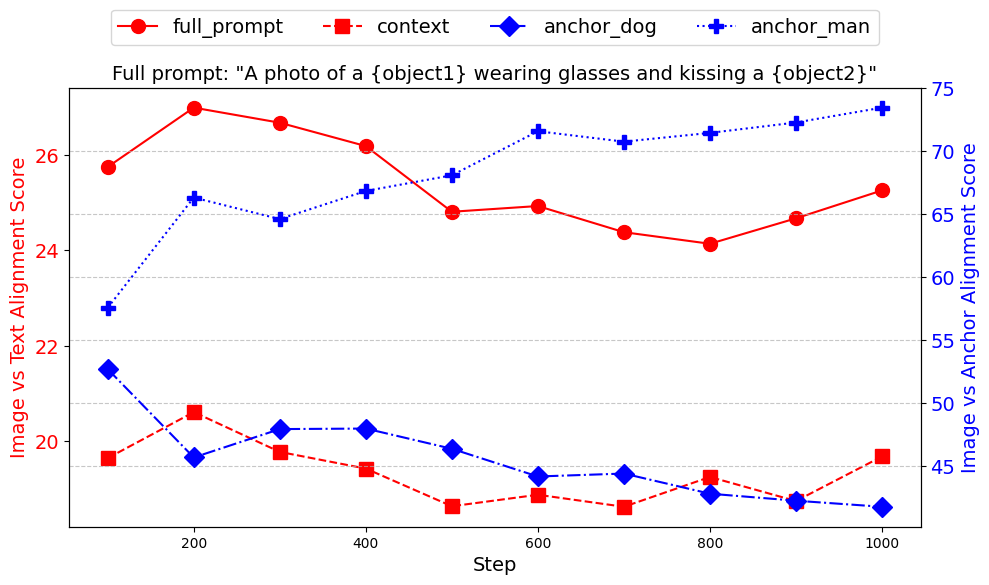

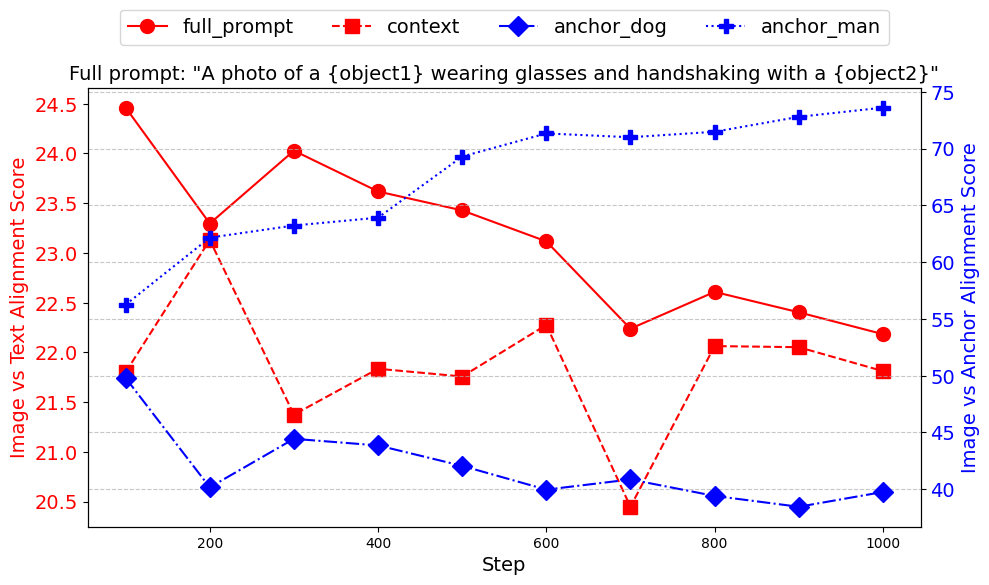

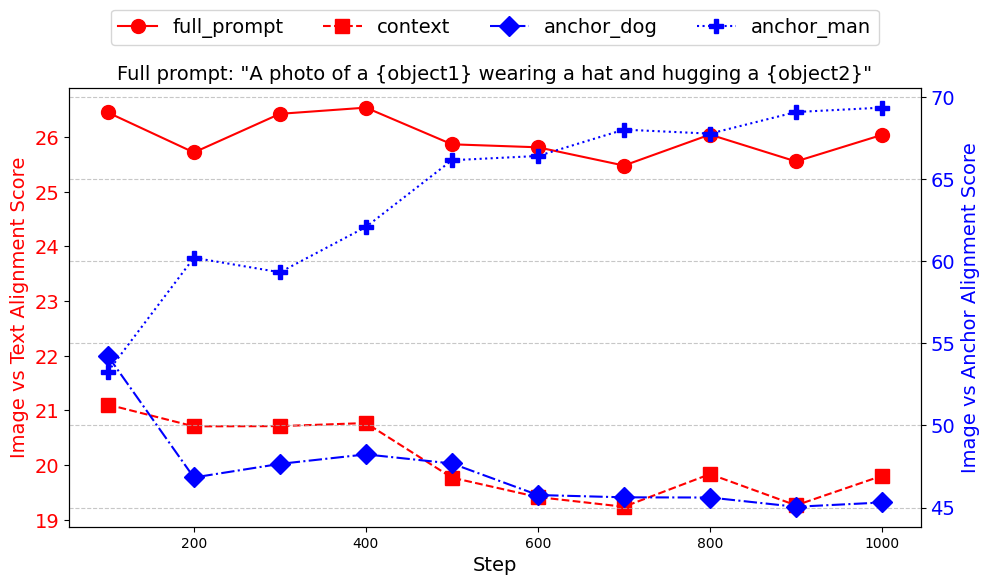

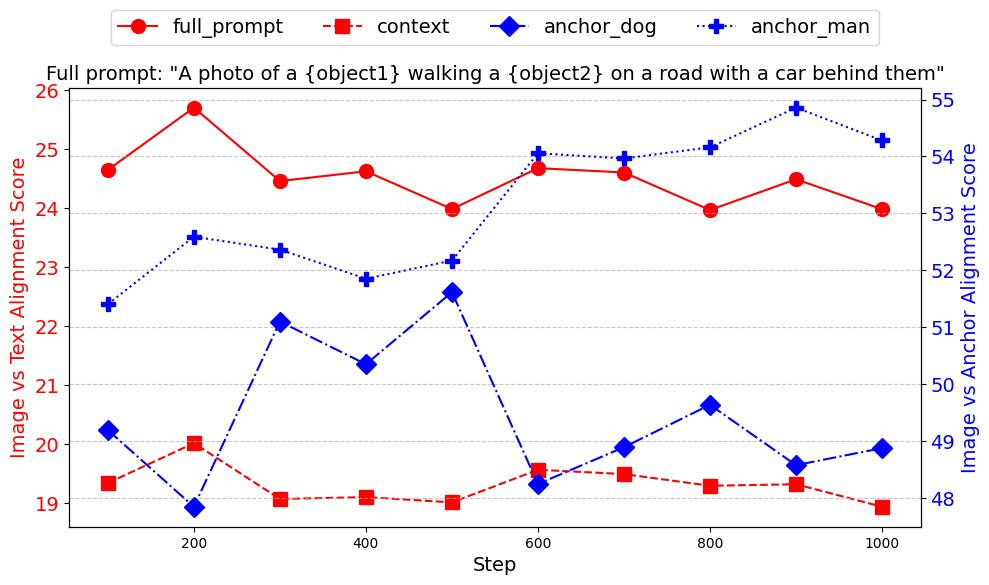

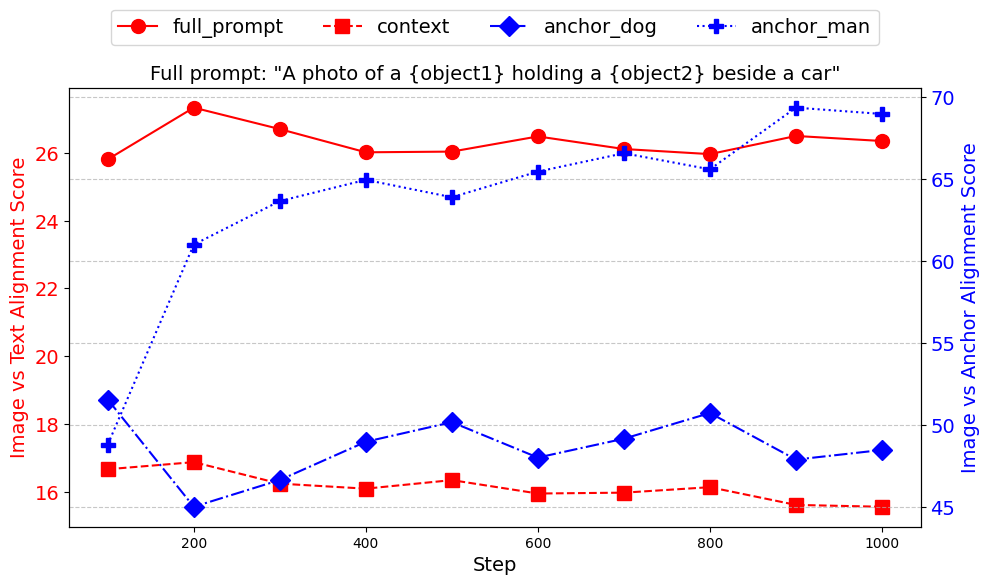

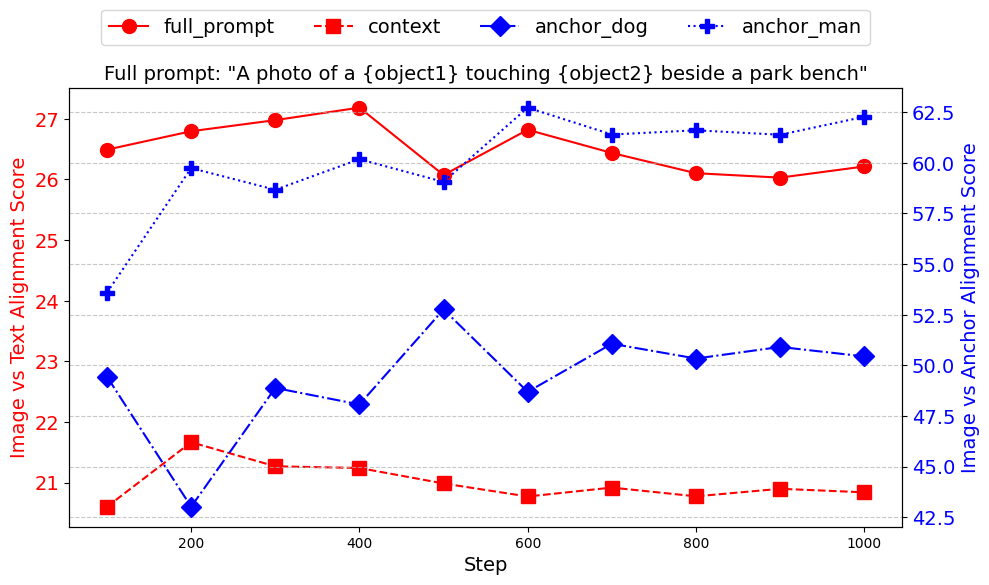

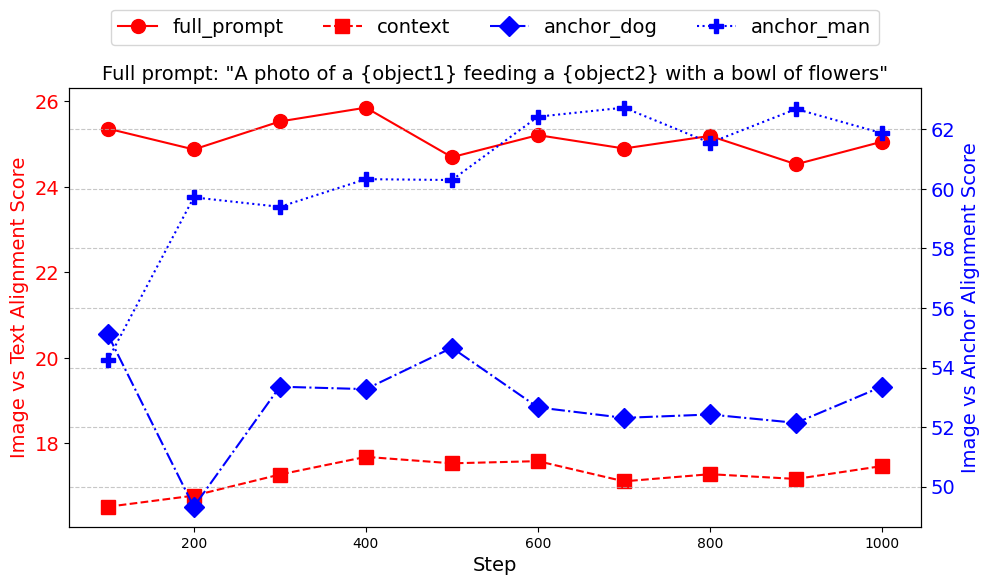

In [27]:
ref_index = 100
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'gray', 'black', 'white', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki', 'lime', 'olive', 'teal', 'navy', 'maroon', 'gold', 'silver', 'indigo', 'turquoise', 'coral', 'khaki']
markers = ['o', 's', 'D', 'P', 'X', 'H', 'v', '^', '<', '>', 'p', '*', 'h', '8', '1', '2', '3', '4', '5', '6', '7', '9', '10']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']

exp_name = 'man_fixed_dog_varied'
exp_name = 'man_varied_dog_fixed'

output_folder = f'results/clip_alignment_scores_combine_two/{exp_name}'

metric_list = ['full_prompt', 'context', 'anchor_dog', 'anchor_man']
anchor_metric_list = ['anchor_dog', 'anchor_man']


os.makedirs(output_folder, exist_ok=True)

# Data structure:
# all_results[exp_name][metric][i][prompt_index]

for prompt_index in range(20):

    if prompt_index not in list(all_results[exp_name]['full_prompt'][100].keys()):
        continue 

    print(prompt_index)
    # given the same prompt index, plot the scores for all settings in the all_results
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ci = -1


    # Plot first set of data on left y-axis
    for metric in metric_list:
        if metric not in anchor_metric_list:
            ci += 1
            temp = []
            iteration_keys = list(all_results[exp_name][metric].keys())
            for iteration in iteration_keys:
                temp.append(all_results[exp_name][metric][iteration][prompt_index]['mean'])
            ax1.plot(iteration_keys, temp, label=metric, color='r', marker=markers[ci], linestyle=line_styles[ci], markersize=10)

    ax1.set_xlabel('Step', fontsize=14)
    ax1.set_ylabel('Image vs Text Alignment Score', color='r', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='r', labelsize=14)

    # Create second y-axis and plot data
    ax2 = ax1.twinx()
    for metric in anchor_metric_list:
        ci += 1
        temp = []
        iteration_keys = list(all_results[exp_name][metric].keys())
        for iteration in iteration_keys:
            temp.append(all_results[exp_name][metric][iteration][prompt_index]['mean'])
        ax2.plot(iteration_keys, temp, label=metric, color='b', marker=markers[ci], linestyle=line_styles[ci], markersize=10)

    ax2.set_ylabel('Image vs Anchor Alignment Score', color='b', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='b', labelsize=14)

    # Add legends for both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
               bbox_to_anchor=(0.5, 1.2), ncol=8, fontsize=14)

    plt.title(f'Full prompt: {all_results[exp_name][metric][iteration][prompt_index]["prompt"]}', y=1.0, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f'all_settings_prompt_{prompt_index}.png'), bbox_inches='tight')
    # plt.show()
    # plt.close()